<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Darts_throwing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problem 1] Choosing a dart mat

In [1]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def choose_mat(start, stop):
 return np.random.choice(np.arange(start, stop))

#[Problem 2] Throw darts and record the place

In [2]:
def throw_dart():
  mean = [0,0] 
  cov = [[0.01,0],[0,0.01]] 
  return np.random.multivariate_normal(mean, cov)

#[Problem 3] Throw a lot of darts and record them in a state of being tied to the number

In [3]:
n_darts = 1000
darts = {}
for _ in range(n_darts):
  mat = choose_mat(1, 7)
  dart = throw_dart()
  darts[mat] = np.concatenate((darts[mat], [dart])) if mat in darts else np.array([dart])

#[Problem 4] Drawing the position of the darts

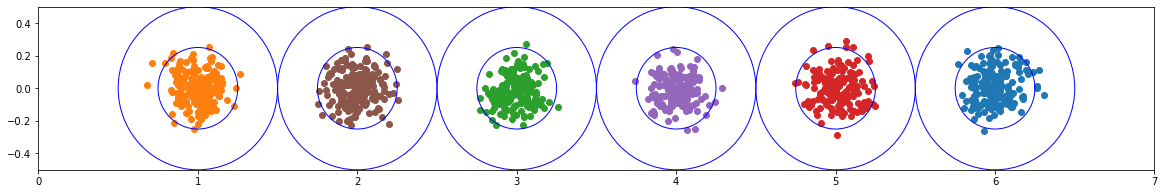

In [4]:
plt.figure(figsize = (20,3))
ax = plt.axes()
for key in darts.keys():
  plt.scatter(darts[key][:, 0] + key, darts[key][:, 1])
  inner = mpatches.Circle(xy = (key, 0), radius = 0.25, ec = 'b', fill = False)
  outer = mpatches.Circle(xy = (key, 0), radius = 0.5, ec = 'b', fill = False)
  ax.add_patch(inner)
  ax.add_patch(outer)
ax.set_xlim(0, 7)
ax.set_ylim(-0.5, 0.5)
plt.show()

#[Problem 5] Functionalization

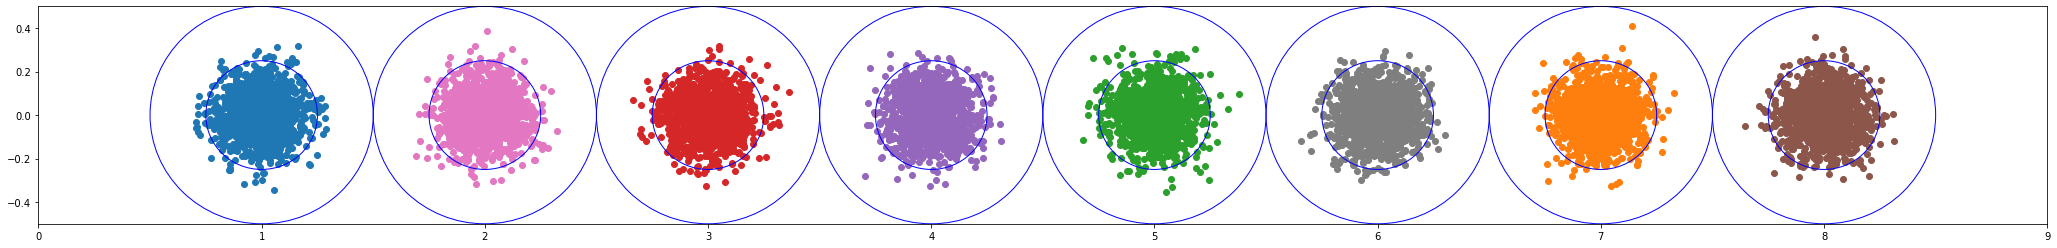

In [5]:
def dart(n_darts, n_mats):
  """
  A function that simulation the throwing darts
  Parameteres
  --------------
  n_darts: int
    Number of darts thrown (default : 1000)
  n_mats: int
    Number of mats (default : 6)
  """  
  darts = {}
  for _ in range(n_darts):
    mat = choose_mat(1, n_mats + 1)
    dart = throw_dart()
    darts[mat] = np.concatenate((darts[mat], [dart])) if mat in darts else np.array([dart])
  plt.figure(figsize = (4*(n_mats + 1), 4))
  ax = plt.axes()
  for key in darts.keys():
    plt.scatter(darts[key][:, 0] + key, darts[key][:, 1])
    inner = mpatches.Circle(xy = (key, 0), radius = 0.25, ec = 'b', fill = False)
    outer = mpatches.Circle(xy = (key, 0), radius = 0.5, ec = 'b', fill = False)
    ax.add_patch(inner)
    ax.add_patch(outer)
  ax.set_xlim(0, n_mats + 1)
  ax.set_ylim(-0.5, 0.5)
  plt.show()
  return
dart(10000, 8)